In [1]:
import pywt
from skimage import io 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import skimage
from skimage import img_as_float
from skimage.transform import resize
from random import choice

In [2]:
# Exercise 5.1

In [3]:
# path= 'C:\Users\master\Assignments\Image Processing\images'
# img = 'Lenna.jpg'
# img = path+'\\'+ img
img= "https://raw.githubusercontent.com/rkwitt/teaching/master/WS1718/IP/PS/Ex2/lena.jpg"
img = io.imread(img)
img= skimage.color.rgb2gray(img)
img=img_as_float(img)
img = resize(img,(256,256),mode='reflect')

In [4]:
def embed(img, where, alpha, SEED):
    wc = pywt.wavedec2(img,'db1',level=2)
    plt.show()
    level1_wc=list(wc[1])
    signal=level1_wc[0]
    signal_vector= signal.ravel()
    N=len(signal_vector)
    
    # plt.figure(figsize=(7,7))
    # plt.subplot(121)
    # vector,bins=np.histogram(signal_vector,bins=256)
    # plt.title('signal_vector ')
    # plt.plot(vector)
    # plt.show()
    
    np.random.seed(SEED)
    watermarkedSequence = np.random.choice([-1, 1],N)
    watermarked_subband = signal_vector + 0.01 * watermarkedSequence

#     plt.subplot(122)
#     vector1,bins=np.histogram(watermarked_subband,bins=256)
#     plt.title('watermarked subband ')
#     plt.plot(vector1)
#     plt.show()

    level1_wc[0]=watermarked_subband.reshape(64,64)
    wav_tuple=(np.array(level1_wc[0]),np.array(level1_wc[1]),np.array(level1_wc[2]))
    wav_list=[wc[0],wav_tuple]
    wc = wav_list
    
    # wc[1][0]=watermarked_subband.reshape(64,64)
    
    watermarked_image=pywt.waverec2(wc,'db1')
    return watermarked_image,watermarked_subband
    

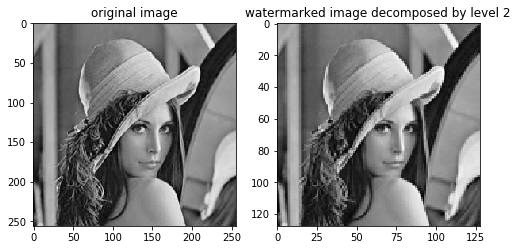

In [5]:
SEED = 1234
where = [1,0]
alpha = 0.01
watermarked_image,watermark_sequence=embed(img,where, alpha , SEED)

plt.figure(figsize=(8,8))
plt.subplot(121)
plt.imshow(img,'gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(watermarked_image,'gray')
plt.title('watermarked image decomposed by level 2')
plt.show()



In [6]:
# Exercise 5.2 

In [7]:
def detect(img, where, watermark_sequence):
    
    wc = pywt.wavedec2(img,'db1',level=1)
    level1_wc=list(wc[1])
    signal = level1_wc[0]
    signal_vector= signal.ravel()
    N=len(signal_vector); 
#     print 'N',N

    score = 0
    for i in range(N):
        score = score + ( signal_vector[i] * watermark_sequence[i])
#         print score,
#         print N
    finalscore = score/N
    return N,finalscore

In [8]:
SEED=1234
N,score =detect(watermarked_image,[1,0],watermark_sequence )

print   'Seed :',SEED,',','score : ',score

Seed : 1234 , score :  0.0129654357605


In [9]:
def generateWatermark ( N, s ) : 
    np.random.seed(s)
    w = np.random.choice([-1, 1],N)
    return w

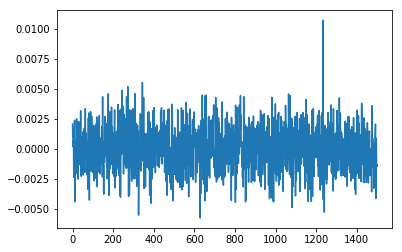

In [15]:

Skor= []
Sid = []
for i in range(1500):
    SEED = i
    print i , '\r',;
    watermark_sequence = generateWatermark ( N , SEED )
    N,sc =detect(watermarked_image,[1,0],watermark_sequence )
    Skor =Skor + [sc]
    Sid =Sid + [SEED]

plt.plot(Sid,Skor)    